<a href="https://colab.research.google.com/github/irfanbykara/Machine-Learning-Notebooks/blob/main/Diabetic_Prediction_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
sns.set()

print('Importing Done.')

Importing Done.


In [ ]:
data = pd.read_csv('diabetes2.csv')
data = data.drop(['Insulin'],axis = 1)
data = data.drop(['SkinThickness'], axis = 1)
data = data.drop(['BloodPressure'], axis = 1)
data.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
4,0,137,43.1,2.288,33,1


In [ ]:
data.isnull().sum()
data = data.dropna(axis=0)


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.shape

(768, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BMI                       768 non-null    float64
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Age                       768 non-null    int64  
 5   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 42.0 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print("Proportion of missing values")
missing_percentage = (data==0).sum()*100/data.shape[0]
missing_percentage

Proportion of missing values


Pregnancies                 14.453125
Glucose                      0.651042
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

In [ ]:
# bp_df = data.loc[data['SkinThickness']==0]
# print("Count of zeros in blood_pressure:", (bp_df['BloodPressure']==0).sum())
# print("Count of zeros in skinfold_thickness:", (bp_df['SkinThickness']==0).sum())


In [ ]:
# print("Count of zeros in blood_pressure:", (bp_df['BloodPressure']==0).sum())
# print("Count of zeros in skinfold_thickness:", (bp_df['SkinThickness']==0).sum())


In [ ]:
m_col = ['Glucose','BMI','DiabetesPedigreeFunction','Age']
colnum=1
for col in m_col:
    data[col]=data[col].replace(0,np.nan)
    colnum+=1
data.isnull().sum()/data.shape[0]

Pregnancies                 0.000000
Glucose                     0.006510
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [ ]:
# data['BloodPressure']

In [ ]:
import sklearn
from sklearn.impute import KNNImputer, SimpleImputer

In [ ]:
imputer = KNNImputer(n_neighbors = 1)
k_data = imputer.fit_transform(data)
df = pd.DataFrame(k_data,columns=data.columns)
data.shape

(768, 6)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

0.0    0.651042
1.0    0.348958
Name: Outcome, dtype: float64

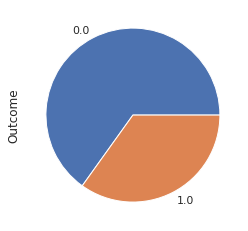

In [ ]:
df['Outcome'].value_counts().plot.pie()
df['Outcome'].value_counts(normalize = True)

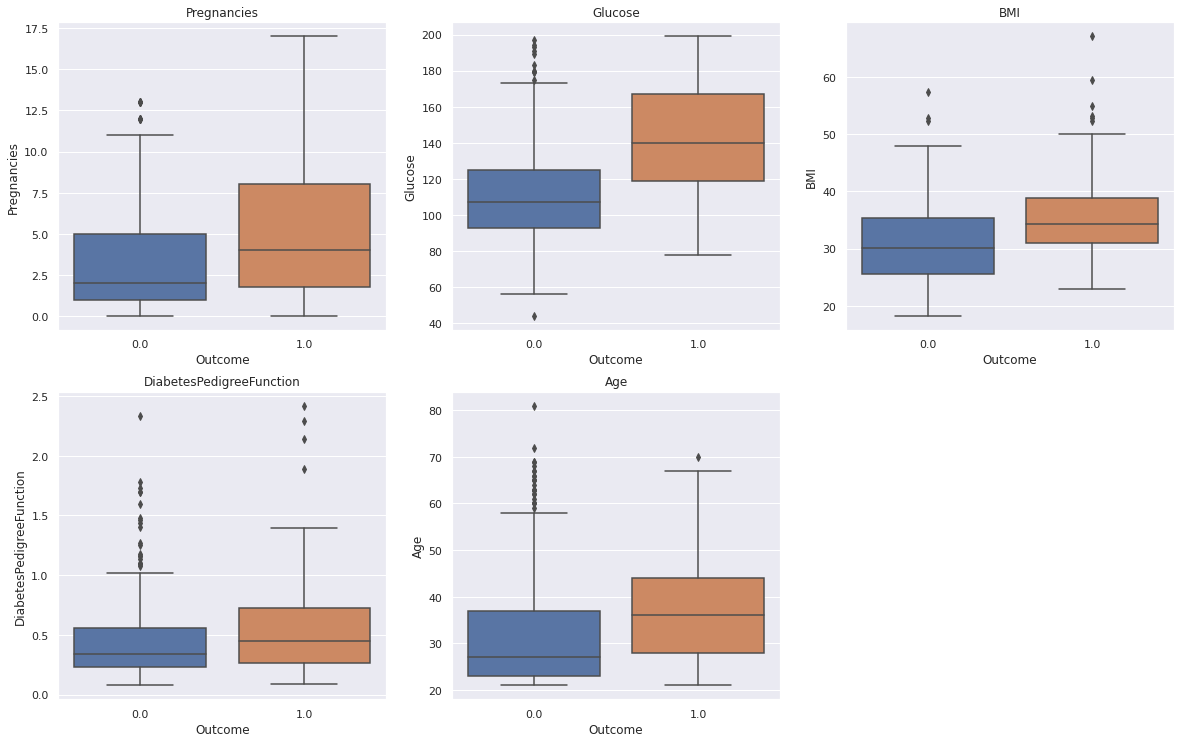

In [ ]:
N_col = ['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(20,60), facecolor='white')
plotnum=1
for col in N_col:
    ax=plt.subplot(9,3,plotnum)
    sns.boxplot(y=df[col],x=df['Outcome'])
    plt.title(col)
    plotnum+=1
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

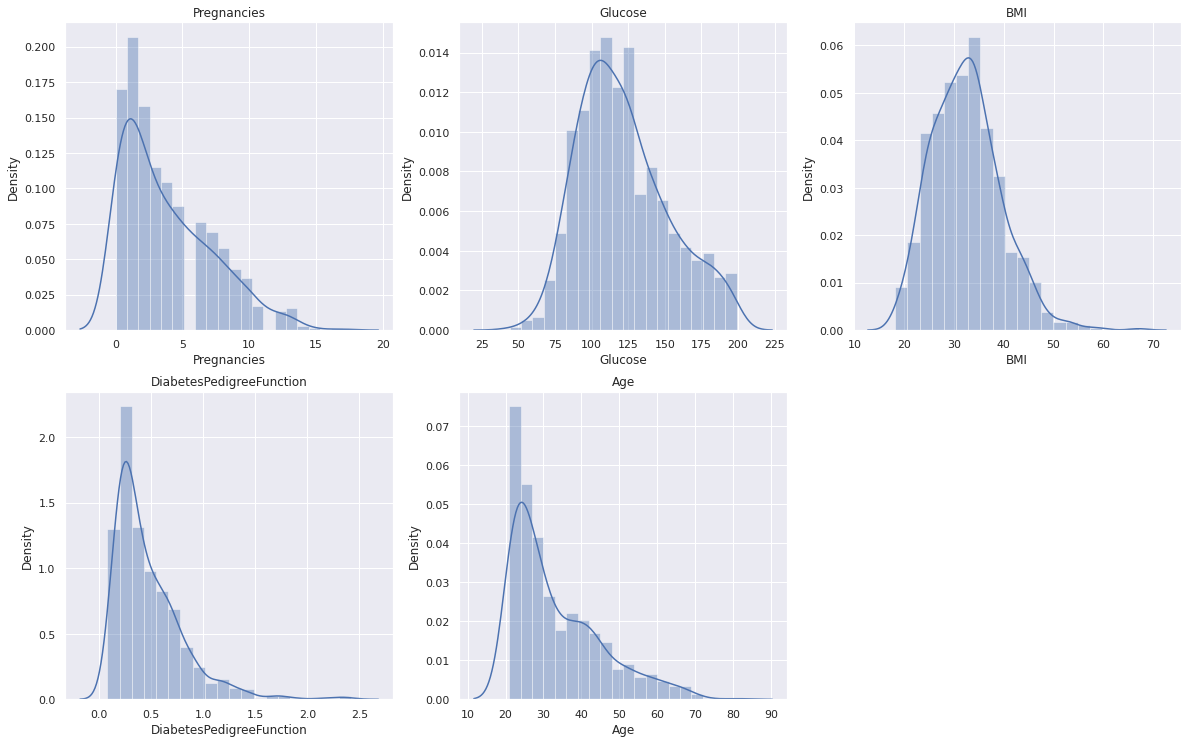

In [ ]:
plt.figure(figsize=(20,60), facecolor='white')
plotnum=1
for col in N_col:
    ax=plt.subplot(9,3,plotnum)
    sns.distplot(df[col], bins=20)
    plt.title(col)
    plotnum+=1
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
count,687.000000,682.000000,678.000000,687.000000,687.000000,687.000000
mean,3.595342,119.549853,32.630088,0.468381,30.254731,0.334789
std,3.284273,29.756397,6.988252,0.333389,8.096396,0.472260
min,0.000000,44.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,27.600000,0.243500,23.000000,0.000000
50%,3.000000,115.000000,32.400000,0.366000,28.000000,0.000000
75%,6.000000,137.000000,36.800000,0.613500,37.000000,1.000000
max,17.000000,199.000000,67.100000,2.420000,50.000000,1.000000


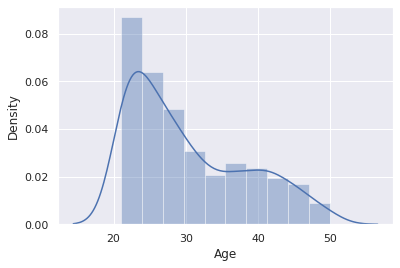

In [ ]:
q = data['Age'].quantile(0.90)
data = data[data['Age']<q]
sns.distplot(data['Age'])
data.describe(include='all')

In [ ]:
# q = data['SkinThickness'].quantile(0.90)
# data = data[data['SkinThickness']<q]
# sns.distplot(data['SkinThickness'])
# data.describe(include='all')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
count,670.000000,665.000000,670.000000,670.000000,670.000000,670.000000
mean,3.611940,119.624060,32.348806,0.465367,30.385075,0.332836
std,3.276292,29.757454,6.513997,0.323539,8.125202,0.471580
min,0.000000,44.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,27.600000,0.243250,24.000000,0.000000
50%,3.000000,115.000000,32.300000,0.367000,28.000000,0.000000
75%,6.000000,138.000000,36.600000,0.613750,37.000000,1.000000
max,17.000000,199.000000,50.000000,2.329000,50.000000,1.000000


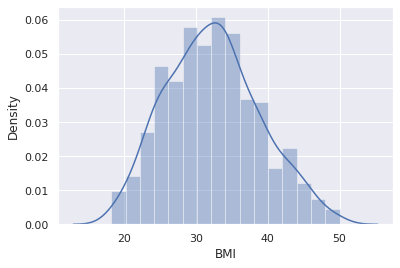

In [ ]:
q = data['BMI'].quantile(0.99)
data = data[data['BMI']<q]
sns.distplot(data['BMI'])
data.describe(include='all')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
count,603.000000,598.000000,603.000000,603.000000,603.000000,603.000000
mean,3.610282,119.107023,32.130348,0.384632,30.208955,0.315091
std,3.258879,29.427000,6.469244,0.198132,8.122778,0.464938
min,0.000000,44.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,27.500000,0.235000,23.000000,0.000000
50%,3.000000,114.000000,32.000000,0.337000,28.000000,0.000000
75%,6.000000,137.000000,36.150000,0.526500,37.000000,1.000000
max,17.000000,198.000000,50.000000,0.875000,50.000000,1.000000


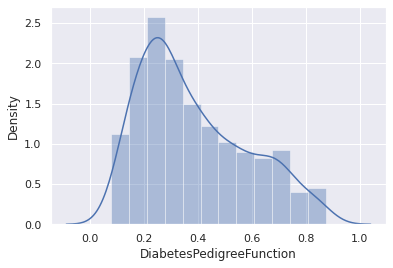

In [ ]:
q = data['DiabetesPedigreeFunction'].quantile(0.90)
data = data[data['DiabetesPedigreeFunction']<q]
sns.distplot(data['DiabetesPedigreeFunction'])
data.describe(include='all')

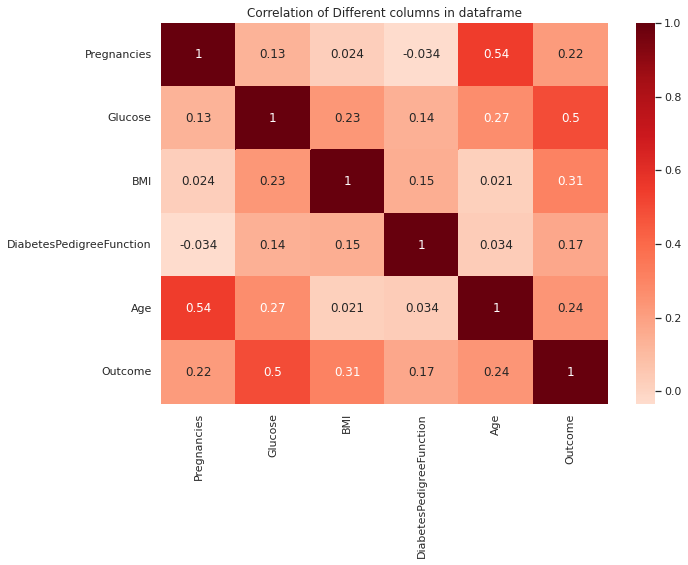

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, cmap='Reds',center = 0.4)
plt.title('Correlation of Different columns in dataframe')
plt.show()

In [ ]:
X = df.drop(['Outcome'], axis = 1)
y= df.Outcome

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_curve,auc, plot_confusion_matrix


In [ ]:
log_model = LogisticRegression(solver='liblinear')
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

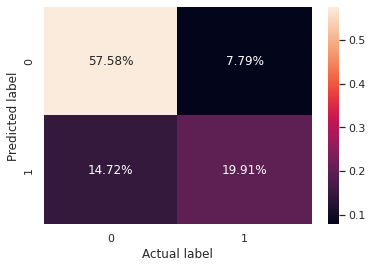

In [ ]:
res= confusion_matrix(y_test, y_pred)
sns.heatmap(res/np.sum(res), annot=True, fmt='.2%')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

In [ ]:
def Model_Performance(test,pred):
    precision = precision_score(test,pred)
    recall = recall_score(test,pred)
    f1 = f1_score(test,pred)
    print('1. Confusion Matrix:\n',confusion_matrix(test, pred))
    print("\n2. Accuracy Score:", round(accuracy_score(test, pred)*100,2),"%")
    print("3. Precision:", round(precision*100,2),"%")
    print("4. Recall:",round(recall*100,2),"%" )
    print("5. F1 Score:",round(f1*100,2),"%" )
    print("6. clasification report:\n",classification_report(test, pred))

In [ ]:
Model_Performance(y_test, y_pred)

1. Confusion Matrix:
 [[133  18]
 [ 34  46]]

2. Accuracy Score: 77.49 %
3. Precision: 71.88 %
4. Recall: 57.5 %
5. F1 Score: 63.89 %
6. clasification report:
               precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       151
         1.0       0.72      0.57      0.64        80

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



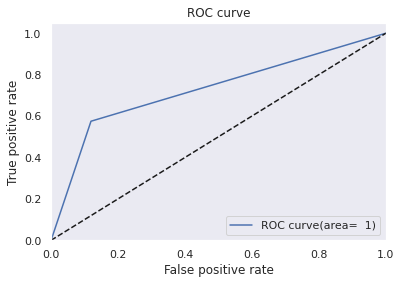

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# sns.scatterplot(data=data.reset_index(),x='index', y='SkinThickness' , hue='Outcome' )


In [ ]:
from sklearn.metrics import roc_auc_score
print( 'AUC Score of Model:',round(roc_auc_score(y_test,y_pred)*100,2),"%")

AUC Score of Model: 72.79 %


In [ ]:
model_f=pd.DataFrame()
model_f['Features'] = list(X_train.columns)
model_f['importance'] = list(log_model.coef_[0])


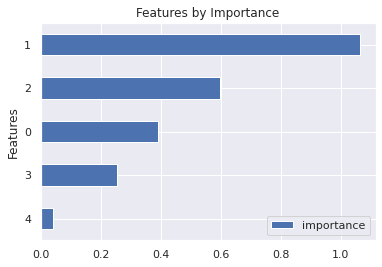

In [ ]:
imp_check=pd.DataFrame(model_f.sort_values(by='importance'))
imp_check.plot.barh(x='Features',y='importance',title='Features by Importance')
plt.show()

In [ ]:
print(imp_check)

   Features  importance
4         4    0.041113
3         3    0.254189
0         0    0.391085
2         2    0.596197
1         1    1.062629
